# Projeto 3: FlightOnTime ✈️ — Previsão de Atrasos de Voos
EDA

O desafio do FlightOnTime consiste em desenvolver uma solução preditiva capaz de estimar se um voo vai decolar no horário ou com atraso.

# 🔹Coleta e Ingestão de Dados

## ✔️ Instalação de dependências

In [1]:
# 1.1 - instalar dependências
!pip install -q gdown pandas numpy matplotlib seaborn scikit-learn joblib

## ✔️ ETL inicial - importação arquivos, descompactação, concatenação

### 2. Baixar o arquivo ZIP diretamente do link público

In [2]:
!pip install gdown

import gdown

# Link direto extraído do compartilhamento público
url = "https://drive.google.com/uc?id=1M6ysDmVp_oOU7YH6e3X7JxRbqwXq2fi7"
output = "voos.zip"

gdown.download(url, output, quiet=False)

print("Download concluído:", output)


Downloading...
From: https://drive.google.com/uc?id=1M6ysDmVp_oOU7YH6e3X7JxRbqwXq2fi7
To: /content/voos.zip
100%|██████████| 23.6M/23.6M [00:00<00:00, 53.2MB/s]

Download concluído: voos.zip


### 3. Descompactar o arquivo

In [3]:
import zipfile
import os

zip_path = "voos.zip"
extract_folder = "voos_raw"

# cria pasta caso não exista
os.makedirs(extract_folder, exist_ok=True)

# extrai os arquivos
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Arquivos extraídos para:", extract_folder)
print("Conteúdo da pasta:")
os.listdir(extract_folder)


Arquivos extraídos para: voos_raw
Conteúdo da pasta:


['VRA_2024_04.csv',
 'VRA_2024_07.csv',
 'VRA_2024_06.csv',
 'VRA_2024_11.csv',
 'VRA_2024_01.csv',
 'VRA_2024_08.csv',
 'VRA_2024_05.csv',
 'VRA_2024_03.csv',
 'VRA_2024_12.csv',
 'VRA_2024_02.csv',
 'VRA_2024_10.csv',
 'VRA_2024_09.csv']

### 4. Ler todos os CSVs e concatenar

In [4]:
import pandas as pd
import glob

csv_files = glob.glob("voos_raw/*.csv")

dataframes = []

for file in csv_files:
    try:
        # tenta separador ponto e vírgula
        df_tmp = pd.read_csv(file, sep=';')
        print(f"{file}: carregado com sep=';'")
    except:
        try:
            # tenta separador vírgula
            df_tmp = pd.read_csv(file, sep=',')
            print(f"{file}: carregado com sep=','")
        except Exception as e:
            print(f"Erro ao carregar {file}: {e}")
            continue

    dataframes.append(df_tmp)

# concatena todos os DataFrames carregados
df = pd.concat(dataframes, ignore_index=True)

print("\nConcatenado com sucesso!")
print("Dimensões finais:", df.shape)

df.head()


voos_raw/VRA_2024_04.csv: carregado com sep=';'
voos_raw/VRA_2024_07.csv: carregado com sep=';'
voos_raw/VRA_2024_06.csv: carregado com sep=';'
voos_raw/VRA_2024_11.csv: carregado com sep=';'
voos_raw/VRA_2024_01.csv: carregado com sep=';'
voos_raw/VRA_2024_08.csv: carregado com sep=';'
voos_raw/VRA_2024_05.csv: carregado com sep=';'
voos_raw/VRA_2024_03.csv: carregado com sep=';'
voos_raw/VRA_2024_12.csv: carregado com sep=';'
voos_raw/VRA_2024_02.csv: carregado com sep=';'
voos_raw/VRA_2024_10.csv: carregado com sep=';'
voos_raw/VRA_2024_09.csv: carregado com sep=';'

Concatenado com sucesso!
Dimensões finais: (987868, 20)


,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Código DI,Código Tipo Linha,Modelo Equipamento,Número de Assentos,Sigla ICAO Aeroporto Origem,Descrição Aeroporto Origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,Descrição Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Justificativa,Referência,Situação Partida,Situação Chegada
0,AAL,"AMERICAN AIRLINES, INC.",0904,0,I,B788,295,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,01/04/2024 23:00,01/04/2024 22:52,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/04/2024 07:35,02/04/2024 07:37,REALIZADO,NaN,2024-04-01,Antecipado,Pontual
1,AAL,"AMERICAN AIRLINES, INC.",0905,0,I,B788,295,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/04/2024 21:45,01/04/2024 22:39,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,02/04/2024 06:00,02/04/2024 07:06,REALIZADO,NaN,2024-04-01,Atraso 30-60,Atraso 60-120
2,AAL,"AMERICAN AIRLINES, INC.",0906,0,I,B772,288,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/04/2024 23:15,01/04/2024 23:05,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/04/2024 07:45,02/04/2024 07:38,REALIZADO,NaN,2024-04-01,Antecipado,Antecipado
3,AAL,"AMERICAN AIRLINES, INC.",0929,0,I,B77W,318,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/04/2024 20:50,01/04/2024 21:58,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,02/04/2024 05:15,02/04/2024 06:23,REALIZADO,NaN,2024-04-01,Atraso 60-120,Atraso 60-120
4,AAL,"AMERICAN AIRLINES, INC.",0930,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/04/2024 21:25,01/04/2024 21:16,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/04/2024 05:55,02/04/2024 06:13,REALIZADO,NaN,2024-04-01,Antecipado,Pontual


### 5. Salva versão 1 arquivo antes da alteração do nome das colunas

In [5]:
df.to_json("voos_concatenados_1.json", orient="records", force_ascii=False)


### 6. Passo seguro - Depois de carregar e concatenar os CSVs

In [6]:
# Criar dataset original 100% preservado
df_raw = df.copy()

# Criar dataset de trabalho (tudo será feito aqui)
df_work = df.copy()

print("Datasets criados:")
print("df_raw  → cópia fiel e intocável")
print("df_work → dataset para limpeza, EDA e modelagem")

Datasets criados:
df_raw  → cópia fiel e intocável
df_work → dataset para limpeza, EDA e modelagem


### 7. Criar datasets de referência

In [7]:
df_raw = df.copy()
df_work = df.copy()

print("df_raw criado (intocável) — shape:", df_raw.shape)
print("df_work criado (dataset de trabalho) — shape:", df_work.shape)

df_raw criado (intocável) — shape: (987868, 20)
df_work criado (dataset de trabalho) — shape: (987868, 20)


### 8. Padronização das colunas (com remoção de acentos)

✔ deixa tudo em minúsculas
✔ remove acentos corretamente
✔ troca espaços por underline
✔ troca hífen por underline
✔ mantém nomes inteiros
✔ não remove letras
✔ não corta palavras

In [8]:
import unicodedata

def normalize_column(col):
    # remove acentos mantendo letras
    col = unicodedata.normalize("NFKD", col).encode("ASCII", "ignore").decode("utf-8")

    col = col.lower()                   # tudo minúsculo
    col = col.strip()                   # tira espaços das pontas
    col = col.replace(" ", "_")         # troca espaços por underline
    col = col.replace("-", "_")         # troca hífen por underline
    col = col.replace("/", "_")         # troca barra por underline
    return col

df_work.columns = [normalize_column(c) for c in df_work.columns]

print("📌 Colunas padronizadas:")
df_work.columns

📌 Colunas padronizadas:


Index(['sigla_icao_empresa_aerea', 'empresa_aerea', 'numero_voo', 'codigo_di',
       'codigo_tipo_linha', 'modelo_equipamento', 'numero_de_assentos',
       'sigla_icao_aeroporto_origem', 'descricao_aeroporto_origem',
       'partida_prevista', 'partida_real', 'sigla_icao_aeroporto_destino',
       'descricao_aeroporto_destino', 'chegada_prevista', 'chegada_real',
       'situacao_voo', 'justificativa', 'referencia', 'situacao_partida',
       'situacao_chegada'],
      dtype='object')

### 9. Salva versão 2 do arquivo após alteração do nome das colunas

In [9]:
df_work.to_json(
    "voos_concatenados_2.json",
    orient="records",
    force_ascii=False
)

# 🔹Inspeção do dataset

In [10]:
df_work.shape

(987868, 20)

### Visualizar as primeiras linhas

In [11]:
print("📌 Primeiras linhas do dataset:")
display(df_work.head())

📌 Primeiras linhas do dataset:


,sigla_icao_empresa_aerea,empresa_aerea,numero_voo,codigo_di,codigo_tipo_linha,modelo_equipamento,numero_de_assentos,sigla_icao_aeroporto_origem,descricao_aeroporto_origem,partida_prevista,partida_real,sigla_icao_aeroporto_destino,descricao_aeroporto_destino,chegada_prevista,chegada_real,situacao_voo,justificativa,referencia,situacao_partida,situacao_chegada
0,AAL,"AMERICAN AIRLINES, INC.",0904,0,I,B788,295,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,01/04/2024 23:00,01/04/2024 22:52,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/04/2024 07:35,02/04/2024 07:37,REALIZADO,NaN,2024-04-01,Antecipado,Pontual
1,AAL,"AMERICAN AIRLINES, INC.",0905,0,I,B788,295,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/04/2024 21:45,01/04/2024 22:39,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,02/04/2024 06:00,02/04/2024 07:06,REALIZADO,NaN,2024-04-01,Atraso 30-60,Atraso 60-120
2,AAL,"AMERICAN AIRLINES, INC.",0906,0,I,B772,288,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/04/2024 23:15,01/04/2024 23:05,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/04/2024 07:45,02/04/2024 07:38,REALIZADO,NaN,2024-04-01,Antecipado,Antecipado
3,AAL,"AMERICAN AIRLINES, INC.",0929,0,I,B77W,318,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/04/2024 20:50,01/04/2024 21:58,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,02/04/2024 05:15,02/04/2024 06:23,REALIZADO,NaN,2024-04-01,Atraso 60-120,Atraso 60-120
4,AAL,"AMERICAN AIRLINES, INC.",0930,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/04/2024 21:25,01/04/2024 21:16,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/04/2024 05:55,02/04/2024 06:13,REALIZADO,NaN,2024-04-01,Antecipado,Pontual


### Informações gerais

In [12]:
print("\n📌 Informações do dataset:")
df_work.info()


📌 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987868 entries, 0 to 987867
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   sigla_icao_empresa_aerea      987868 non-null  object 
 1   empresa_aerea                 987868 non-null  object 
 2   numero_voo                    987868 non-null  object 
 3   codigo_di                     987868 non-null  object 
 4   codigo_tipo_linha             987867 non-null  object 
 5   modelo_equipamento            987868 non-null  object 
 6   numero_de_assentos            987868 non-null  int64  
 7   sigla_icao_aeroporto_origem   987868 non-null  object 
 8   descricao_aeroporto_origem    987868 non-null  object 
 9   partida_prevista              955925 non-null  object 
 10  partida_real                  944715 non-null  object 
 11  sigla_icao_aeroporto_destino  987868 non-null  object 
 12  descricao_aeropor

### Estatísticas iniciais

In [13]:
print("\n📌 Estatísticas descritivas:")
display(df_work.describe(include='all'))


📌 Estatísticas descritivas:


,sigla_icao_empresa_aerea,empresa_aerea,numero_voo,codigo_di,codigo_tipo_linha,modelo_equipamento,numero_de_assentos,sigla_icao_aeroporto_origem,descricao_aeroporto_origem,partida_prevista,partida_real,sigla_icao_aeroporto_destino,descricao_aeroporto_destino,chegada_prevista,chegada_real,situacao_voo,justificativa,referencia,situacao_partida,situacao_chegada
count,987868,987868,987868,987868,987867,987868,987868.000000,987868,987868,955925,944715,987868,987868,955923,944715,987868,0.0,987868,912772,912772
unique,110,113,6677,10,5,63,NaN,385,386,109401,414698,392,393,109065,419664,3,NaN,366,6,6
top,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,0248,0,N,A320,NaN,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,16/04/2024 06:00,10/11/2024 12:50,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,09/02/2024 11:00,01/08/2024 15:55,REALIZADO,NaN,2024-12-20,Antecipado,Antecipado
freq,310744,310744,1534,948433,796923,156302,NaN,140952,140952,33,13,141067,141067,32,12,944715,NaN,3026,478128,527741
mean,NaN,NaN,NaN,NaN,NaN,NaN,157.660563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,70.998240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,136.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,186.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analise valores nulos

In [14]:
print("\n📌 Valores nulos por coluna:")
display(df_work.isnull().sum())


📌 Valores nulos por coluna:


,0
sigla_icao_empresa_aerea,0
empresa_aerea,0
numero_voo,0
codigo_di,0
codigo_tipo_linha,1
modelo_equipamento,0
numero_de_assentos,0
sigla_icao_aeroporto_origem,0
descricao_aeroporto_origem,0
partida_prevista,31943


✔️ Para modelagem

👉 Remover os registros com nulos em partida_prevista ou partida_real, com objetivo de modelagem preditiva de atraso baseada em partida prevista vs real (necessário).

### Verificar colunas únicas (útil em aeroportos, companhias etc.)

In [15]:
print("\n📌 Colunas e quantidades de valores únicos:")
display(df_work.nunique())


📌 Colunas e quantidades de valores únicos:


,0
sigla_icao_empresa_aerea,110
empresa_aerea,113
numero_voo,6677
codigo_di,10
codigo_tipo_linha,5
modelo_equipamento,63
numero_de_assentos,224
sigla_icao_aeroporto_origem,385
descricao_aeroporto_origem,386
partida_prevista,109401


### Valores únicos e frequência (Situação do Voo)

In [16]:
# Frequência dos valores da coluna situacao_voo
situacao_voo_freq = (
    df_work['situacao_voo']
    .value_counts(dropna=False)
    .reset_index()
)

situacao_voo_freq.columns = ['situacao_voo', 'quantidade']

display(situacao_voo_freq)


,situacao_voo,quantidade
0,REALIZADO,944715
1,CANCELADO,43068
2,NÃO INFORMADO,85


# 🔹Análise exploratória de dados

### Percentual de atraso por número do voo

In [17]:
df_work['partida_prevista'] = pd.to_datetime(df_work['partida_prevista'], errors='coerce')
df_work['partida_real'] = pd.to_datetime(df_work['partida_real'], errors='coerce')


df_work['atraso_minutos'] = (
    df_work['partida_real'] - df_work['partida_prevista']
).dt.total_seconds() / 60


df_work['atraso_voo'] = (df_work['atraso_minutos'] > 15).astype(int)


atraso_por_voo = (
    df_work
    .groupby('numero_voo')['atraso_voo']
    .agg(['count', 'mean'])
    .rename(columns={'count': 'total_voos', 'mean': 'taxa_atraso'})
    .sort_values('total_voos', ascending=False)
)

atraso_por_voo.head(10)


,total_voos,taxa_atraso
numero_voo,,
0248,1534,0.074316
0506,1344,0.162946
0015,1274,0.095761
0507,1098,0.098361
0249,1096,0.055657
0016,933,0.163987
8147,931,0.094522
0926,864,0.049769
8157,839,0.038141


### Taxa de atraso por período

In [18]:
df_work['hora_partida'] = df_work['partida_prevista'].dt.hour

#Calcular taxa de atraso por hora
atraso_por_hora = (
    df_work
    .groupby('hora_partida')['atraso_voo']
    .agg(['count', 'mean'])
    .rename(columns={
        'count': 'total_voos',
        'mean': 'taxa_atraso'
    })
    .sort_index()
)

atraso_por_hora


# Taxa de atraso por período do dia
def periodo_dia(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noite'

df_work['periodo_dia'] = df_work['hora_partida'].apply(periodo_dia)


# Calcular taxa de atraso por período
atraso_por_periodo = (
    df_work
    .groupby('periodo_dia')['atraso_voo']
    .agg(['count', 'mean'])
    .rename(columns={
        'count': 'total_voos',
        'mean': 'taxa_atraso'
    })
    .sort_values('taxa_atraso', ascending=False)
)

atraso_por_periodo


,total_voos,taxa_atraso
periodo_dia,,
Tarde,120485,0.192978
Manhã,118762,0.134647
Noite,748621,0.035284


## Quantidade de voos por companhia

In [19]:
# Quantidade de voos por companhia aérea (sigla + nome)
voos_por_cia = (
    df_work
    .groupby(['sigla_icao_empresa_aerea', 'empresa_aerea'])
    .size()
    .reset_index(name='quantidade_voos')
    .sort_values(by='quantidade_voos', ascending=False)
)

# Visualizar as 15 companhias com mais voos
display(voos_por_cia.head(15))

,sigla_icao_empresa_aerea,empresa_aerea,quantidade_voos
21,AZU,AZUL LINHAS AÉREAS BRASILEIRAS S/A,310744
97,TAM,TAM LINHAS AÉREAS S.A.,267505
47,GLO,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,221737
5,ACN,AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA),25353
77,PTB,PASSAREDO TRANSPORTES AÉREOS S.A.,16864
14,ARG,AEROLINEAS ARGENTINAS S/A,11794
98,TAP,TAP - TRANSPORTES AÉREOS PORTUGUESES S/A,9597
62,LAN,LATAM AIRLINES GROUP (EX - LAN AIRLINES S/A),9092
30,CMP,COMPAÑIA PANAMEÑA DE AVIACION S.A. (COPA AIRLI...,8243
90,SID,SIDERAL LINHAS AÉREAS LTDA.,7519


Gráfico: Top 15 companhias com mais voos

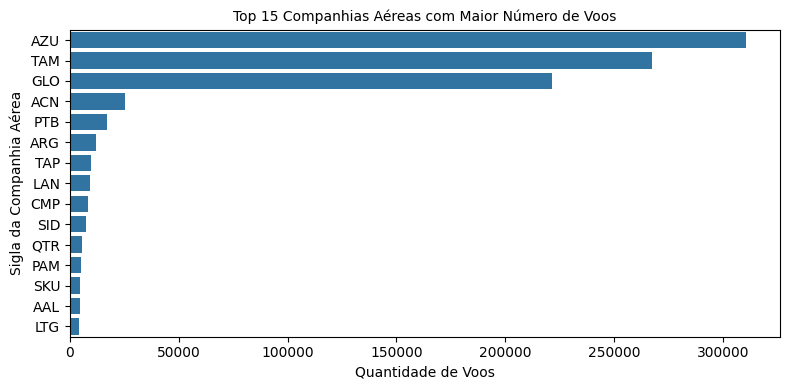

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar Top 15 companhias
top_15_cias = voos_por_cia.head(15)

# Configuração visual
plt.figure(figsize=(8, 4))
sns.barplot(
    data=top_15_cias,
    x='quantidade_voos',
    y='sigla_icao_empresa_aerea'
)

plt.title("Top 15 Companhias Aéreas com Maior Número de Voos", fontsize=10)
plt.xlabel("Quantidade de Voos")
plt.ylabel("Sigla da Companhia Aérea")

plt.tight_layout()
plt.show()

## Análise global de voos: Cancelado x Realizado

### Top 10 companhias com mais voos REALIZADOS

In [21]:
realizados_por_cia = (
    df_work[df_work['situacao_voo'] == 'REALIZADO']
    .groupby('sigla_icao_empresa_aerea')
    .size()
    .reset_index(name='quantidade_voos_realizados')
    .sort_values(by='quantidade_voos_realizados', ascending=False)
)

# Exibir Top 10
display(realizados_por_cia.head(10))

,sigla_icao_empresa_aerea,quantidade_voos_realizados
20,AZU,299164
90,TAM,263469
44,GLO,218338
5,ACN,20878
73,PTB,15602
91,TAP,9496
59,LAN,9032
29,CMP,8129
14,ARG,7517
84,SID,7163


## Análise de situação de partida por CIA

In [22]:
tabela_partida = df_work.pivot_table(
    index='empresa_aerea',
    columns='situacao_partida',
    values='numero_voo',
    aggfunc='count',
    fill_value=0
)

display(tabela_partida)


situacao_partida,Antecipado,Atraso 120-240,Atraso 30-60,Atraso 60-120,Atraso > 240,Pontual
empresa_aerea,,,,,,
ABSA - AEROLINHAS BRASILEIRAS S.A.,952,198,280,292,154,716
AEROLINEAS ARGENTINAS S/A,2905,65,448,191,45,2359
AEROLÍNEA DEL CARIBE S.A. - AERCARIBE,2,0,0,0,0,2
AEROSUCRE SA,10,2,2,2,1,9
AEROTRANSPORTES MAS DE CARGA S.A. DE C.V.,45,19,12,16,21,27
...,...,...,...,...,...,...
TRANSPORTES AEREOS BOLIVIANOS,1,0,0,0,0,1
TURKISH AIRLINES INC,741,111,241,160,88,953
UKRAINE AIR ALLIANCE AIRLINES,7,9,4,8,26,5


## 📊  Distribuição do target (atraso_voo)

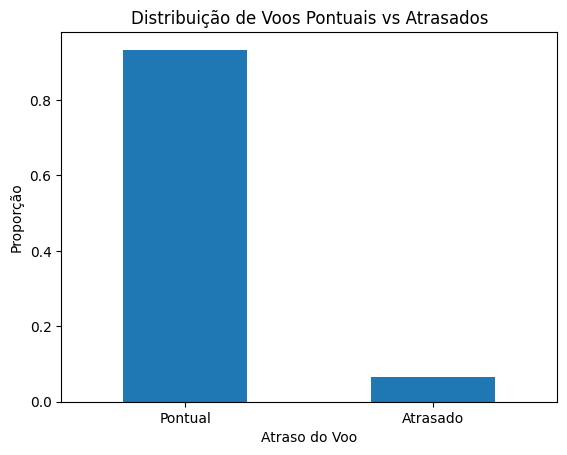

In [148]:
import matplotlib.pyplot as plt

df_work['atraso_voo'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribuição de Voos Pontuais vs Atrasados')
plt.xlabel('Atraso do Voo')
plt.ylabel('Proporção')
plt.xticks([0, 1], ['Pontual', 'Atrasado'], rotation=0)
plt.show()


## 📊 Taxa de atraso por período do dia

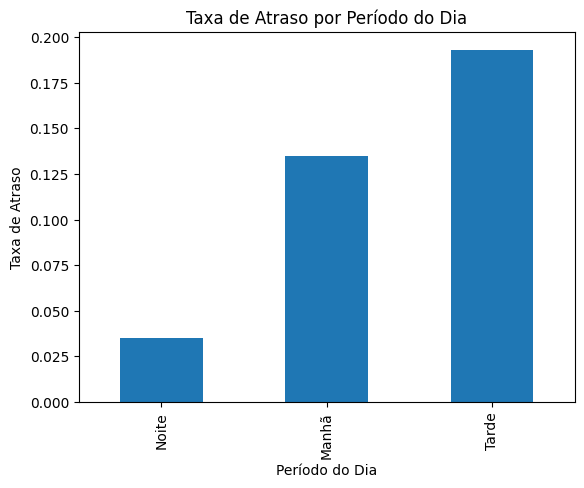

In [149]:
atraso_por_periodo = (
    df_work.groupby('periodo_dia')['atraso_voo']
    .mean()
    .sort_values()
)

atraso_por_periodo.plot(kind='bar')
plt.title('Taxa de Atraso por Período do Dia')
plt.xlabel('Período do Dia')
plt.ylabel('Taxa de Atraso')
plt.show()


## 📊 Taxa de atraso por hora prevista de partida

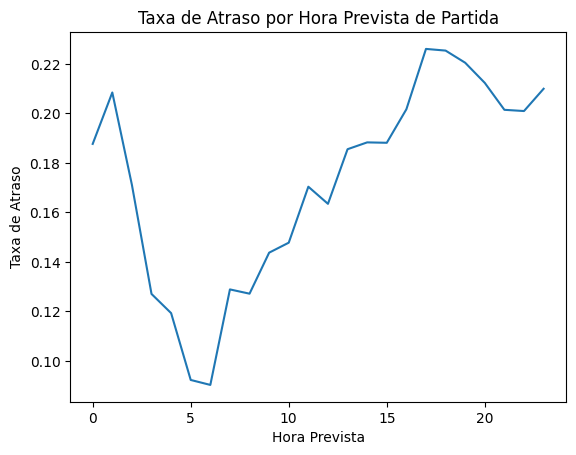

In [155]:
df_hora = df_work.dropna(subset=['hora_partida'])

atraso_por_hora = (
    df_hora.groupby('hora_partida')['atraso_voo']
    .mean()
)

atraso_por_hora.plot()
plt.title('Taxa de Atraso por Hora Prevista de Partida')
plt.xlabel('Hora Prevista')
plt.ylabel('Taxa de Atraso')
plt.show()


## 📊 Top 10 aeroportos de origem com maior taxa de atraso

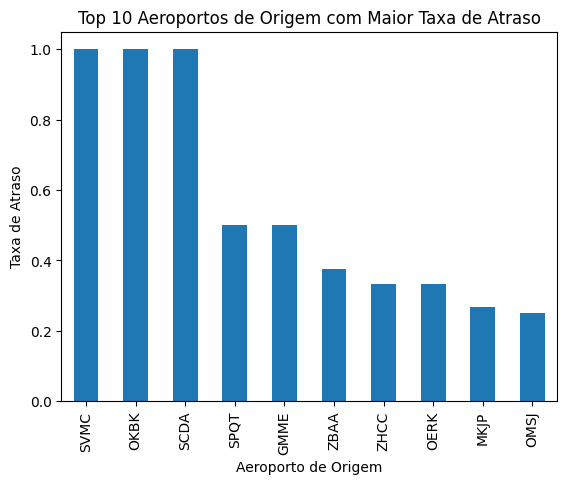

In [151]:
atraso_por_aeroporto = (
    df_work.groupby('sigla_icao_aeroporto_origem')['atraso_voo']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

atraso_por_aeroporto.plot(kind='bar')
plt.title('Top 10 Aeroportos de Origem com Maior Taxa de Atraso')
plt.xlabel('Aeroporto de Origem')
plt.ylabel('Taxa de Atraso')
plt.show()


## 📊 Top 10 companhias aéreas por taxa de atraso

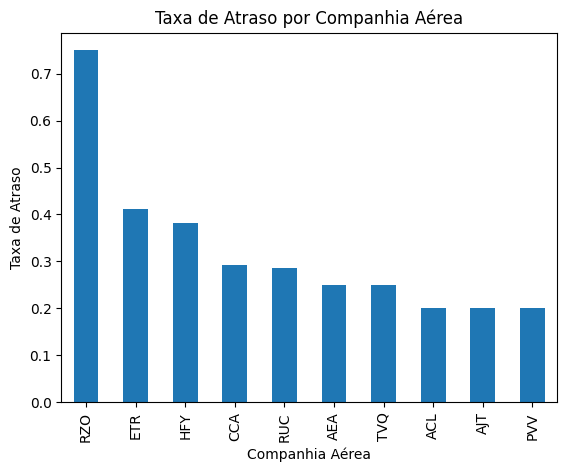

In [152]:
atraso_por_companhia = (
    df_work.groupby('sigla_icao_empresa_aerea')['atraso_voo']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

atraso_por_companhia.plot(kind='bar')
plt.title('Taxa de Atraso por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Taxa de Atraso')
plt.show()


## 📊 Taxa de atraso por dia da semana

/tmp/ipython-input-1467235599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['dia_semana'] = df_data['partida_prevista'].dt.day_name()


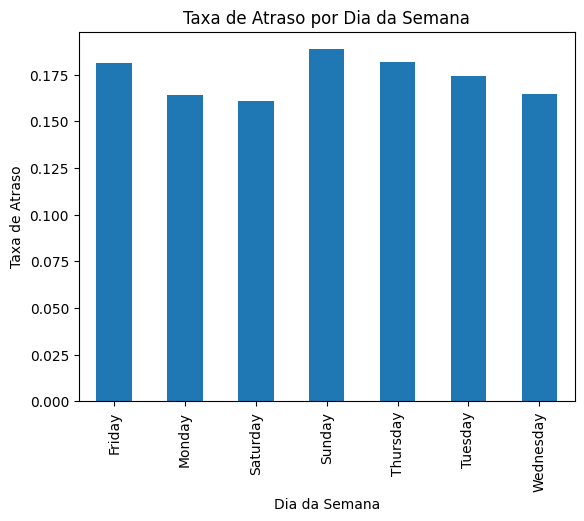

In [156]:
df_data = df_work.dropna(subset=['partida_prevista'])

df_data['dia_semana'] = df_data['partida_prevista'].dt.day_name()

atraso_por_dia = (
    df_data.groupby('dia_semana')['atraso_voo']
    .mean()
)

atraso_por_dia.plot(kind='bar')
plt.title('Taxa de Atraso por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Taxa de Atraso')
plt.show()


## EDA: Problemas de dados

### Frequência dos valores da coluna situacao_partida

In [23]:
situacao_partida_freq = (
    df_work['situacao_partida']
    .value_counts(dropna=False)
    .reset_index()
)

situacao_partida_freq.columns = ['situacao_partida', 'quantidade']

display(situacao_partida_freq)


,situacao_partida,quantidade
0,Antecipado,478128
1,Pontual,347486
2,NaN,75096
3,Atraso 30-60,49679
4,Atraso 60-120,23631
5,Atraso 120-240,9724
6,Atraso > 240,4124


🧠 Análise:

* Antecipado (478,128 voos) - Grande parte dos voos parece partir antes do previsto, o que é um dado positivo em termos de pontualidade. Pode ser interessante estudar esse comportamento para ver se existem causas comuns (ex.: procedimentos operacionais eficientes, horários de menor tráfego).

* Pontual (347,486 voos) - Uma quantidade significativa de voos é pontual (decolando dentro do horário previsto). Isso ajuda a entender que uma boa parte das operações está funcionando como esperado.

* NaN (75,096 voos) - Este é o ponto crítico: 75k voos sem status de partida. Pode indicar: Falta de dados: o status não foi registrado. Cancelamentos registrados muito cedo (antes de serem realocados ou reprogramados).
Para EDA: importante registrar esse dado para avaliar as falhas na coleta de dados, mas não deve ser usado diretamente no modelo.
Para o pipeline, esses registros precisam ser ignorados ou filtrados.

* Atrasos mais curtos (30-60 minutos) são os mais frequentes.
49k voos com atraso entre 30-60 minutos.

* Atrasos mais longos (acima de 60 minutos) apresentam uma distribuição decrescente.

* Atraso > 240 minutos (mais de 4h) é bem raro (apenas 4k voos).
Esse comportamento de atrasos curtos é bem esperado, pois muitas vezes os voos se atrasam em 30-60 minutos devido a uma série de razões como fila para decolagem, clima, etc.


💡 Ações de Análise

Contextualizar os valores NaN como um problema operacional (falta de dados) e garantir que eles sejam excluídos ou ignorados no modelo.

Atrasos de 30-60 minutos podem ser tratados como uma categoria intermediária (não necessariamente como “atraso grave”).

Criar métricas como porcentagem de atrasos por categoria (ex.: "X% dos voos tem mais de 60 minutos de atraso").

Investigar se os atrasos longos (acima de 2 horas) são por problemas de infraestrutura, clima ou outros fatores.

## Inspecionar valores únicos do status

In [24]:
df_work['situacao_partida'].value_counts(dropna=False)


,count
situacao_partida,
Antecipado,478128
Pontual,347486
NaN,75096
Atraso 30-60,49679
Atraso 60-120,23631
Atraso 120-240,9724
Atraso > 240,4124


### 📌 Com base na análise exploratória, observamos que o atraso está associado ao período do dia, horário do voo, aeroporto de origem, companhia aérea e dia da semana. Essas variáveis serão utilizadas na modelagem preditiva.

# 🔹Tratamento dos dados

### cria novo dataset - df_clean (V1)

In [25]:
# Criar dataset de trabalho (tudo será feito aqui)
df_clean = df_work.copy()

### Remove coluna Justificativa

In [26]:
if 'justificativa' in df_clean.columns:
    df_clean = df_clean.drop(columns=['justificativa'])

### Remove coluna Referencia

In [27]:
if 'referencia' in df_clean.columns:
    df_clean = df_clean.drop(columns=['referencia'])

### Remover colunas descricao_aeroporto_origem e descricao_aeroporto_destino

In [28]:
if 'descricao_aeroporto_origem' in df_clean.columns:
    df_clean = df_clean.drop(columns=['descricao_aeroporto_origem'])

In [29]:
if 'descricao_aeroporto_destino' in df_clean.columns:
    df_clean = df_clean.drop(columns=['descricao_aeroporto_destino'])

### Remoção de voos cancelados e não informados

In [30]:
# Ver quantidade antes
print("Registros antes:", df_clean.shape[0])

# Remover voos cancelados ou não informados
df_clean = df_clean[
    ~df_clean['situacao_voo'].isin(['CANCELADO', 'NÃO INFORMADO'])
]

# Ver quantidade depois
print("Registros depois:", df_clean.shape[0])

Registros antes: 987868
Registros depois: 944715


# 🔹Pipeline modelo preditivo

### cria novo dataset - df_clean_vf (versão final)

In [75]:
df_clean.to_json("voos_clean_v1.json", orient="records", force_ascii=False)


In [116]:
# Criar dataset de trabalho (tudo será feito aqui)
df_clean_vf = df_clean.copy()

In [117]:
df_clean_vf.columns

Index(['sigla_icao_empresa_aerea', 'empresa_aerea', 'numero_voo', 'codigo_di',
       'codigo_tipo_linha', 'modelo_equipamento', 'numero_de_assentos',
       'sigla_icao_aeroporto_origem', 'partida_prevista', 'partida_real',
       'sigla_icao_aeroporto_destino', 'chegada_prevista', 'chegada_real',
       'situacao_voo', 'situacao_partida', 'situacao_chegada',
       'atraso_minutos', 'atraso_voo', 'hora_partida', 'periodo_dia'],
      dtype='object')

### Remover os registros com codigo_tipo_linha diferente de

In [118]:
# Agrupar e contar os valores da coluna
agrupado = (
    df_clean_vf
    .groupby('codigo_tipo_linha')
    .size()
    .reset_index(name='quantidade')
    .sort_values(by='quantidade', ascending=False)
)

print(agrupado)


  codigo_tipo_linha  quantidade
3                 N      772412
2                 I      128947
0                 C       20618
1                 G       13604
4                 X        9134


In [119]:
df_clean_vf = df_clean_vf[df_clean_vf['codigo_tipo_linha'].isin(['I', 'N', 'X'])]


In [120]:
# Agrupar e contar os valores da coluna
agrupado = (
    df_clean_vf
    .groupby('codigo_tipo_linha')
    .size()
    .reset_index(name='quantidade')
    .sort_values(by='quantidade', ascending=False)
)

print(agrupado)

  codigo_tipo_linha  quantidade
1                 N      772412
0                 I      128947
2                 X        9134


### Remover coluna situacao_voo

Após a filtragem dos voos cancelados e com situação nula, todos os registros remanescentes apresentaram situacao_voo = REALIZADO. Assim, a coluna foi removida por não agregar informação relevante à análise.

In [121]:
agrupado_situacao = (
    df_clean_vf
    .groupby('situacao_voo')
    .size()
    .reset_index(name='quantidade')
    .sort_values(by='quantidade', ascending=False)
)

print(agrupado_situacao)


  situacao_voo  quantidade
0    REALIZADO      910493


In [122]:
df_clean_vf = df_clean_vf.drop(columns=['situacao_voo'])


### Remoção coluna numero_voo

In [123]:
df_clean_vf = df_clean_vf.drop(columns=['numero_voo'])
df_clean_vf.columns

Index(['sigla_icao_empresa_aerea', 'empresa_aerea', 'codigo_di',
       'codigo_tipo_linha', 'modelo_equipamento', 'numero_de_assentos',
       'sigla_icao_aeroporto_origem', 'partida_prevista', 'partida_real',
       'sigla_icao_aeroporto_destino', 'chegada_prevista', 'chegada_real',
       'situacao_partida', 'situacao_chegada', 'atraso_minutos', 'atraso_voo',
       'hora_partida', 'periodo_dia'],
      dtype='object')

### Geração de dicionário de empresas aéreas
Etapa responsável por extrair a relação única entre sigla_icao_empresa_aerea e empresa_aerea, gerando um arquivo JSON de referência. Após a geração do dicionário, a coluna empresa_aerea é removida do dataset principal para evitar redundância.

In [124]:
import json

# Criar dataframe apenas com as colunas necessárias
df_empresas = (
    df_clean_vf[['sigla_icao_empresa_aerea', 'empresa_aerea']]
    .drop_duplicates()
    .sort_values('sigla_icao_empresa_aerea')
)

# Converter para dicionário
empresas_dict = dict(
    zip(
        df_empresas['sigla_icao_empresa_aerea'],
        df_empresas['empresa_aerea']
    )
)

# Salvar em arquivo JSON
with open('empresas_aereas.json', 'w', encoding='utf-8') as f:
    json.dump(empresas_dict, f, ensure_ascii=False, indent=4)


In [125]:
df_clean_vf = df_clean_vf.drop(columns=['empresa_aerea'])

### Geração de dicionário de aeroportos
Etapa de leitura que consolida códigos ICAO de aeroportos de origem e destino e gera um arquivo JSON de referência, sem qualquer modificação no dataset operacional.

In [126]:
# usando df_work pois dataset atual a coluna descricao_aeroporto foi removida

import json
import pandas as pd

# Criar dataframe apenas com as colunas necessárias (origem + destino)
df_aeroportos = (
    df_work[
        [
            'sigla_icao_aeroporto_origem',
            'descricao_aeroporto_origem',
            'sigla_icao_aeroporto_destino',
            'descricao_aeroporto_destino'
        ]
    ]
)

# Padronizar em duas colunas (codigo, nome)
df_aeroportos = pd.concat([
    df_aeroportos[['sigla_icao_aeroporto_origem', 'descricao_aeroporto_origem']]
        .rename(columns={
            'sigla_icao_aeroporto_origem': 'sigla_icao_aeroporto',
            'descricao_aeroporto_origem': 'descricao_aeroporto'
        }),
    df_aeroportos[['sigla_icao_aeroporto_destino', 'descricao_aeroporto_destino']]
        .rename(columns={
            'sigla_icao_aeroporto_destino': 'sigla_icao_aeroporto',
            'descricao_aeroporto_destino': 'descricao_aeroporto'
        })
])

# Remover duplicados e ordenar
df_aeroportos = (
    df_aeroportos
    .dropna()
    .drop_duplicates()
    .sort_values('sigla_icao_aeroporto')
)

# Converter para dicionário
aeroportos_dict = dict(
    zip(
        df_aeroportos['sigla_icao_aeroporto'],
        df_aeroportos['descricao_aeroporto']
    )
)

# Salvar em arquivo JSON
with open('aeroportos.json', 'w', encoding='utf-8') as f:
    json.dump(aeroportos_dict, f, ensure_ascii=False, indent=4)

### Conversão de data e hora

In [127]:
# Criar colunas de data e hora a partir da partida prevista
df_clean_vf['data_partida_prevista'] = df_clean_vf['partida_prevista'].dt.date
df_clean_vf['hora_partida_prevista'] = df_clean_vf['partida_prevista'].dt.hour

# Verificação
df_clean_vf[
    ['partida_prevista', 'data_partida_prevista', 'hora_partida_prevista']
].head()

,partida_prevista,data_partida_prevista,hora_partida_prevista
0,2024-01-04 23:00:00,2024-01-04,23.0
1,2024-01-04 21:45:00,2024-01-04,21.0
2,2024-01-04 23:15:00,2024-01-04,23.0
3,2024-01-04 20:50:00,2024-01-04,20.0
4,2024-01-04 21:25:00,2024-01-04,21.0


In [128]:
# Criar colunas de data e hora a partir da partida_real
df_clean_vf['data_partida_real'] = df_clean_vf['partida_real'].dt.date
df_clean_vf['hora_partida_real'] = df_clean_vf['partida_real'].dt.hour

# Verificação
df_clean_vf[
    ['partida_real', 'data_partida_real', 'hora_partida_real']
].head()

,partida_real,data_partida_real,hora_partida_real
0,2024-01-04 22:52:00,2024-01-04,22.0
1,2024-01-04 22:39:00,2024-01-04,22.0
2,2024-01-04 23:05:00,2024-01-04,23.0
3,2024-01-04 21:58:00,2024-01-04,21.0
4,2024-01-04 21:16:00,2024-01-04,21.0


In [129]:
# converte tipo datetime
df_clean_vf['chegada_prevista'] = pd.to_datetime(df_clean_vf['chegada_prevista'], errors='coerce')
# Criar colunas de data e hora a partir da chegada_prevista
df_clean_vf['data_chegada_prevista'] = df_clean_vf['chegada_prevista'].dt.date
df_clean_vf['hora_chegada_prevista'] = df_clean_vf['chegada_prevista'].dt.hour

# Verificação
df_clean_vf[
    ['chegada_prevista', 'data_chegada_prevista', 'hora_chegada_prevista']
].head()

,chegada_prevista,data_chegada_prevista,hora_chegada_prevista
0,2024-02-04 07:35:00,2024-02-04,7.0
1,2024-02-04 06:00:00,2024-02-04,6.0
2,2024-02-04 07:45:00,2024-02-04,7.0
3,2024-02-04 05:15:00,2024-02-04,5.0
4,2024-02-04 05:55:00,2024-02-04,5.0


In [130]:
# converte tipo datetime
df_clean_vf['chegada_real'] = pd.to_datetime(df_clean_vf['chegada_real'], errors='coerce')
# Criar colunas de data e hora a partir da chegada_real
df_clean_vf['data_chegada_real'] = df_clean_vf['chegada_real'].dt.date
df_clean_vf['hora_chegada_real'] = df_clean_vf['chegada_real'].dt.hour

# Verificação
df_clean_vf[
    ['chegada_real', 'data_chegada_real', 'hora_chegada_real']
].head()

,chegada_real,data_chegada_real,hora_chegada_real
0,2024-02-04 07:37:00,2024-02-04,7.0
1,2024-02-04 07:06:00,2024-02-04,7.0
2,2024-02-04 07:38:00,2024-02-04,7.0
3,2024-02-04 06:23:00,2024-02-04,6.0
4,2024-02-04 06:13:00,2024-02-04,6.0


In [131]:
# Ajustar tipo da hora para inteiro
df_clean_vf['hora_partida_prevista'] = (
    df_clean_vf['hora_partida_prevista']
    .astype('Int64')  # aceita nulos, diferente de int64
)

# Verificar tipos
df_clean_vf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 910493 entries, 0 to 987867
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   sigla_icao_empresa_aerea      910493 non-null  object        
 1   codigo_di                     910493 non-null  object        
 2   codigo_tipo_linha             910493 non-null  object        
 3   modelo_equipamento            910493 non-null  object        
 4   numero_de_assentos            910493 non-null  int64         
 5   sigla_icao_aeroporto_origem   910493 non-null  object        
 6   partida_prevista              347526 non-null  datetime64[ns]
 7   partida_real                  358973 non-null  datetime64[ns]
 8   sigla_icao_aeroporto_destino  910493 non-null  object        
 9   chegada_prevista              347413 non-null  datetime64[ns]
 10  chegada_real                  358876 non-null  datetime64[ns]
 11  situacao_partida  

### Tratamento de valores nulos (somente o essencial)

Manter apenas voos válidos para cálculo de atraso

⚠️ Decisão técnica (importante explicar)
Para classificação supervisionada de atraso:
❌ Não dá para usar linhas sem partida_prevista
❌ Não dá para calcular atraso sem partida_real
✅ O dataset vai diminuir, e isso é esperado

👉 Melhor um dataset menor e correto do que grande e inválido.

In [132]:
# Quantidade antes
total_antes = len(df_clean_vf)

# Remover registros sem partida prevista ou partida real
df_clean_vf = df_clean_vf.dropna(
    subset=['partida_prevista', 'partida_real']
)

# Quantidade depois
total_depois = len(df_clean_vf)

print(f"Linhas antes: {total_antes}")
print(f"Linhas depois: {total_depois}")
print(f"Removidas: {total_antes - total_depois}")
print(f"Percentual removido: {((total_antes - total_depois) / total_antes) * 100:.2f}%")


Linhas antes: 910493
Linhas depois: 347318
Removidas: 563175
Percentual removido: 61.85%


🔎 Interpretação do resultado

Dataset original: 910.493 voos -
Dataset válido para atraso: 347.318 voos -
Remoção: 61,85%

👉 Isso acontece porque:

muitos voos não têm horário real registrado;
outros não têm partida prevista operacional;
voos cancelados já tinham sido removidos

💡 347 mil registros é um volume excelente para:

Random Forest;
treino/teste estratificado;
MVP de hackathon

In [133]:
# Remover coluna redundante (hora em float)
if 'hora_partida' in df_clean_vf.columns:
    df_clean_vf = df_clean_vf.drop(columns=['hora_partida'])

# Garantir tipo inteiro para atraso_voo (se já existir)
if 'atraso_voo' in df_clean_vf.columns:
    df_clean_vf['atraso_voo'] = df_clean_vf['atraso_voo'].astype(int)

# Conferência final da Etapa 3
df_clean_vf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 347318 entries, 0 to 987863
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   sigla_icao_empresa_aerea      347318 non-null  object        
 1   codigo_di                     347318 non-null  object        
 2   codigo_tipo_linha             347318 non-null  object        
 3   modelo_equipamento            347318 non-null  object        
 4   numero_de_assentos            347318 non-null  int64         
 5   sigla_icao_aeroporto_origem   347318 non-null  object        
 6   partida_prevista              347318 non-null  datetime64[ns]
 7   partida_real                  347318 non-null  datetime64[ns]
 8   sigla_icao_aeroporto_destino  347318 non-null  object        
 9   chegada_prevista              344465 non-null  datetime64[ns]
 10  chegada_real                  344437 non-null  datetime64[ns]
 11  situacao_partida  

### Criação da Variável Alvo (Target)

In [134]:
# Recalcular atraso em minutos a partir das datas
df_clean_vf['atraso_minutos_calc'] = (
    df_clean_vf['partida_real'] - df_clean_vf['partida_prevista']
).dt.total_seconds() / 60


In [135]:
df_clean_vf['atraso_minutos_calc'].describe()


,atraso_minutos_calc
count,347318.000000
mean,232.941745
std,3463.327176
min,-89280.000000
25%,-7.000000
50%,-1.000000
75%,9.000000
max,131147.000000


In [136]:
# Comparar atraso_voo existente com o cálculo
df_clean_vf['atraso_voo_validacao'] = (
    df_clean_vf['atraso_minutos_calc'] > 15
).astype(int)

# Verificar divergências
divergencias = (
    df_clean_vf['atraso_voo'] != df_clean_vf['atraso_voo_validacao']
).sum()

total = len(df_clean_vf)

print(f"Divergências encontradas: {divergencias}")
print(f"Percentual divergente: {(divergencias / total) * 100:.4f}%")


Divergências encontradas: 0
Percentual divergente: 0.0000%


In [137]:
# Remover colunas auxiliares de validação
df_clean_vf = df_clean_vf.drop(
    columns=['atraso_minutos_calc', 'atraso_voo_validacao'],
    errors='ignore'
)

# Conferência final
df_clean_vf[['atraso_minutos', 'atraso_voo']].head()


,atraso_minutos,atraso_voo
0,-8.0,0
1,54.0,1
2,-10.0,0
3,68.0,1
4,-9.0,0


In [139]:
df_clean_vf.head()

,sigla_icao_empresa_aerea,codigo_di,codigo_tipo_linha,modelo_equipamento,numero_de_assentos,sigla_icao_aeroporto_origem,partida_prevista,partida_real,sigla_icao_aeroporto_destino,chegada_prevista,...,atraso_voo,periodo_dia,data_partida_prevista,hora_partida_prevista,data_partida_real,hora_partida_real,data_chegada_prevista,hora_chegada_prevista,data_chegada_real,hora_chegada_real
0,AAL,0,I,B788,295,SBGL,2024-01-04 23:00:00,2024-01-04 22:52:00,KMIA,2024-02-04 07:35:00,...,0,Noite,2024-01-04,23,2024-01-04,22.0,2024-02-04,7.0,2024-02-04,7.0
1,AAL,0,I,B788,295,KMIA,2024-01-04 21:45:00,2024-01-04 22:39:00,SBGL,2024-02-04 06:00:00,...,1,Noite,2024-01-04,21,2024-01-04,22.0,2024-02-04,6.0,2024-02-04,7.0
2,AAL,0,I,B772,288,SBGR,2024-01-04 23:15:00,2024-01-04 23:05:00,KMIA,2024-02-04 07:45:00,...,0,Noite,2024-01-04,23,2024-01-04,23.0,2024-02-04,7.0,2024-02-04,7.0
3,AAL,0,I,B77W,318,KMIA,2024-01-04 20:50:00,2024-01-04 21:58:00,SBGR,2024-02-04 05:15:00,...,1,Noite,2024-01-04,20,2024-01-04,21.0,2024-02-04,5.0,2024-02-04,6.0
4,AAL,0,I,B77W,318,SBGR,2024-01-04 21:25:00,2024-01-04 21:16:00,KMIA,2024-02-04 05:55:00,...,0,Noite,2024-01-04,21,2024-01-04,21.0,2024-02-04,5.0,2024-02-04,6.0


### Feature Engineering

In [146]:
# =========================
# Feature Engineering
# =========================

# 1. Componentes temporais (a partir de partida_prevista)
if 'dia_semana' not in df_clean_vf.columns:
    df_clean_vf['dia_semana'] = df_clean_vf['partida_prevista'].dt.dayofweek

if 'mes' not in df_clean_vf.columns:
    df_clean_vf['mes'] = df_clean_vf['partida_prevista'].dt.month


# 2. Criação da rota (origem_destino)
if 'rota' not in df_clean_vf.columns:
    df_clean_vf['rota'] = (
        df_clean_vf['sigla_icao_aeroporto_origem']
        + '_'
        + df_clean_vf['sigla_icao_aeroporto_destino']
    )


### Salva versão atual

In [147]:
df_clean_vf.to_json(
    "voos_clean_v2.json",
    orient="records",
    force_ascii=False
)

### Cria dataset final para segurança

In [157]:
# Criar dataset de trabalho
df_model = df_clean_vf.copy()

### Remove colunas desnecessárias para o feature engineering

❌ Colunas que NÃO devem ser usadas (data leakage ou irrelevantes)

Essas colunas não existem no momento da previsão ou entregam o resultado indiretamente:

🚫 Identificadores técnicos

codigo_di
→ Apenas ID do voo, não generaliza

🚫 Situação real do voo

situacao_partida
situacao_chegada
→ Já indicam se atrasou ou não

🚫 Variáveis diretamente ligadas ao atraso

atraso_minutos
→ É praticamente o próprio target

🚫 Horários e datas reais (aconteceram depois)

data_partida_real
hora_partida_real
data_chegada_real
hora_chegada_real

🚫 Informações de chegada (mesmo previstas)

data_chegada_prevista
hora_chegada_prevista
→ Em um MVP simples, não são necessárias
→ Podem ser incluídas depois como engenharia de atributos (ex.: duração planejada)

Essa seleção:

* evita vazamento de dados
* está 100% alinhada com a API /predict
* é perfeita para alunos iniciantes
* permite bons resultados com Logistic Regression ou Random Forest

In [158]:
# remove colunas
# codigo_di
df_model = df_model.drop(columns=['codigo_di'])
# situacao_partida
df_model = df_model.drop(columns=['situacao_partida'])
# situacao_chegada
df_model = df_model.drop(columns=['situacao_chegada'])
# atraso_minutos
df_model = df_model.drop(columns=['atraso_minutos'])
# chegada_prevista
df_model = df_model.drop(columns=['chegada_prevista'])
# chegada_real
df_model = df_model.drop(columns=['chegada_real'])
# partida_real
df_model = df_model.drop(columns=['partida_real'])
# data_partida_real
df_model = df_model.drop(columns=['data_partida_real'])
# hora_partida_real
df_model = df_model.drop(columns=['hora_partida_real'])
# data_chegada_real
df_model = df_model.drop(columns=['data_chegada_real'])
# hora_chegada_real
df_model = df_model.drop(columns=['hora_chegada_real'])

### Salva versão para o feature engineering

In [159]:
df_model.to_json(
    "voos_model.json",
    orient="records",
    force_ascii=False
)

In [160]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347318 entries, 0 to 987863
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   sigla_icao_empresa_aerea      347318 non-null  object        
 1   codigo_tipo_linha             347318 non-null  object        
 2   modelo_equipamento            347318 non-null  object        
 3   numero_de_assentos            347318 non-null  int64         
 4   sigla_icao_aeroporto_origem   347318 non-null  object        
 5   partida_prevista              347318 non-null  datetime64[ns]
 6   sigla_icao_aeroporto_destino  347318 non-null  object        
 7   atraso_voo                    347318 non-null  int64         
 8   periodo_dia                   347318 non-null  object        
 9   data_partida_prevista         347318 non-null  object        
 10  hora_partida_prevista         347318 non-null  Int64         
 11  data_chegada_previ